In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 10]
import json
import numpy as np

In [48]:
with open('lingling40hrs_data.json', 'r') as data_f:
    sub_data = json.load(data_f)

In [20]:
FLAIRS = []

In [66]:
def plot_dict(data_dict):
    plt.barh(*zip(*data_dict.items()))
    plt.show()
    
def print_csv(data_dict):
    for flair, data in data_dict.items():
        print(f"{flair}, {data}")
        
def print_csv_group(data_dict):
    for flair, data in data_dict.items():
        line = flair
        for item in data:
            line += f",{item}"
        print(line)

In [87]:
flair_points = {}
flair_posts = {}
flair_posts_ind = {}

link_flair_posts = {}
link_flair_point = {}

for user, data in sub_data.items():
    if data['flair'] not in flair_points:
        flair_points[data['flair']] = 0
        flair_posts[data['flair']] = 0
        flair_posts_ind[data['flair']] = []
        
    for sub_id, submission in data['submissions'].items():
        flair_posts[data['flair']] += 1
        flair_points[data['flair']] += submission['score']
        flair_posts_ind[data['flair']].append(submission['score'])
        
        if submission['link_flair_text'] not in link_flair_posts:
            link_flair_posts[submission['link_flair_text']] = 0
            link_flair_points[submission['link_flair_text']] = 0
        
        link_flair_posts[submission['link_flair_text']] += 1
        link_flair_points[submission['link_flair_text']] += submission['score']

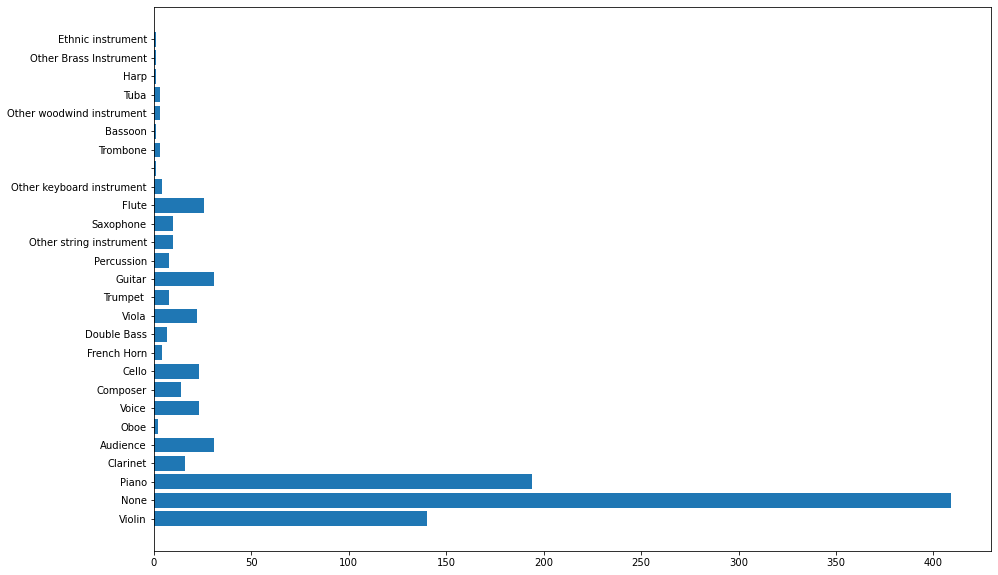

In [57]:
plot_dict(flair_posts)

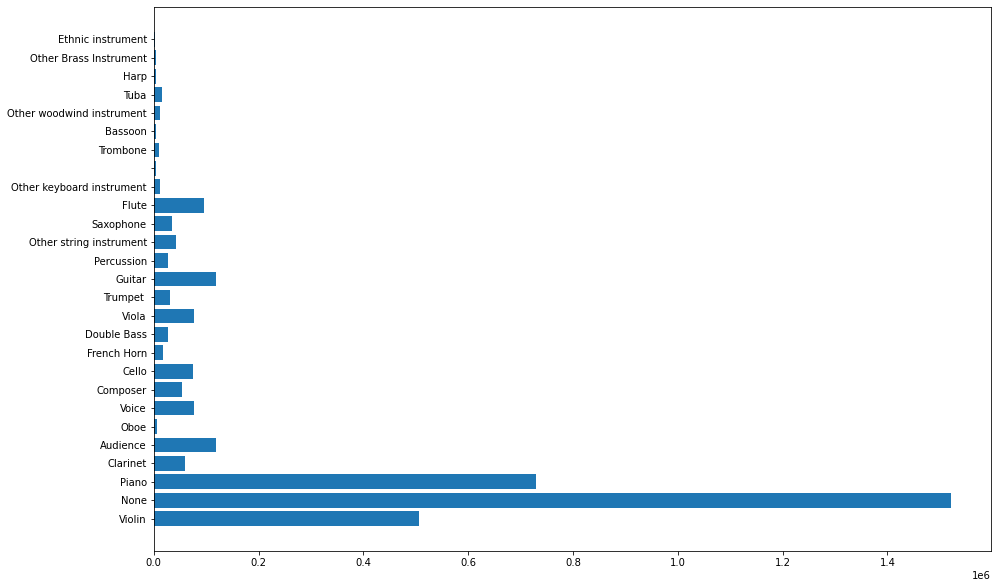

In [58]:
plot_dict(flair_points)

In [59]:
avg_posts = {}
med_posts = {}
for flair, posts in flair_posts_ind.items():
    avg_posts[flair] = np.mean(posts)
    med_posts[flair] = np.median(posts)


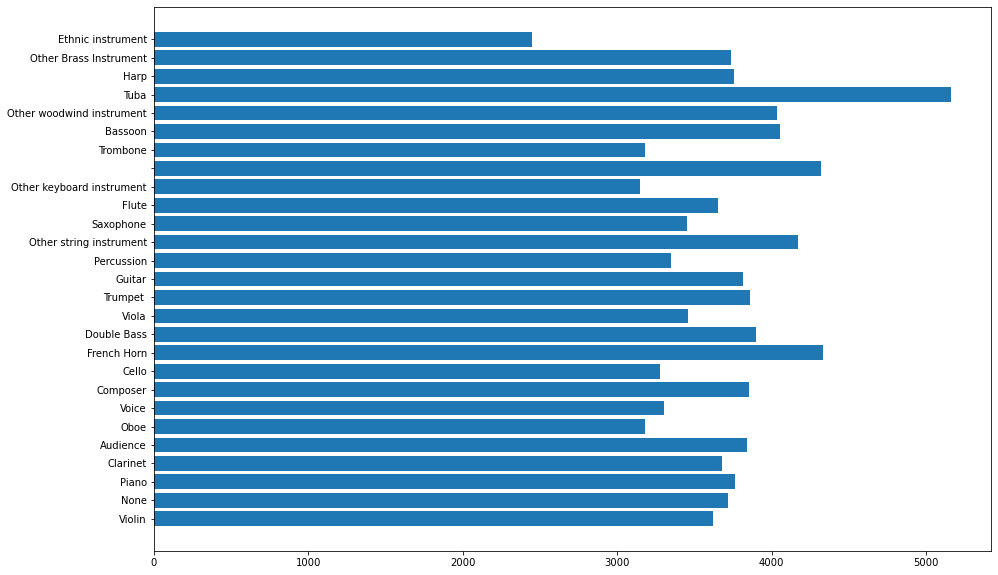

In [60]:
plot_dict(avg_posts)

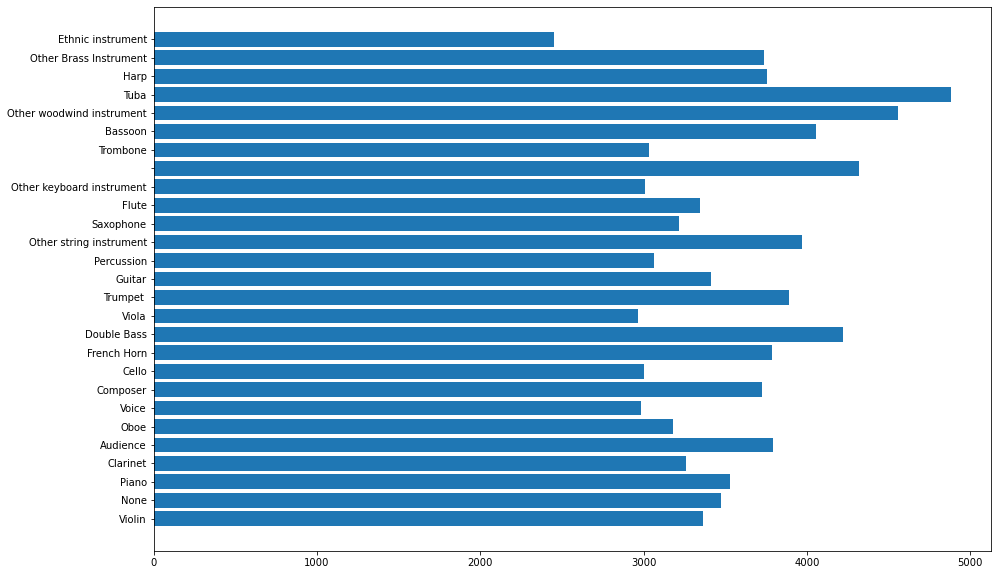

In [61]:
plot_dict(med_posts)

In [62]:
print_csv(med_posts)

Violin, 3360.5
None, 3472.0
Piano, 3531.0
Clarinet, 3258.5
Audience, 3794.0
Oboe, 3179.5
Voice, 2985.0
Composer, 3727.0
Cello, 3004.0
French Horn, 3786.5
Double Bass, 4222.0
Viola, 2968.0
Trumpet , 3892.5
Guitar, 3412.0
Percussion, 3060.5
Other string instrument, 3972.5
Saxophone, 3216.5
Flute, 3347.5
Other keyboard instrument, 3008.5
, 4317.0
Trombone, 3030.0
Bassoon, 4057.0
Other woodwind instrument, 4559.0
Tuba, 4882.0
Harp, 3758.0
Other Brass Instrument, 3735.0
Ethnic instrument, 2450.0


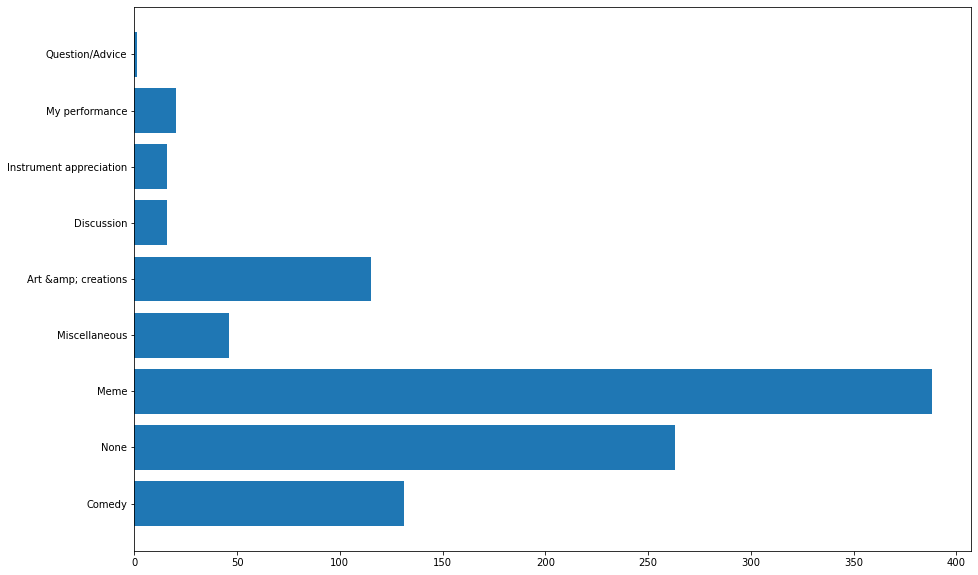

In [63]:
plot_dict(link_flair_posts)

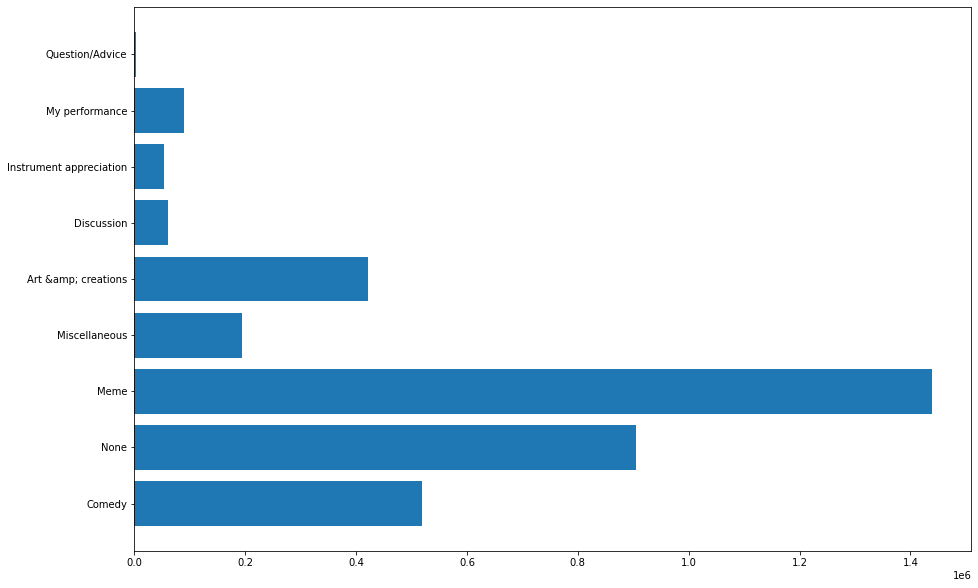

In [64]:
plot_dict(link_flair_points)

In [65]:
print_csv(link_flair_posts)

Comedy, 131
None, 263
Meme, 388
Miscellaneous, 46
Art &amp; creations, 115
Discussion, 16
Instrument appreciation, 16
My performance, 20
Question/Advice, 1


In [68]:
print_csv_group(flair_posts_ind)

Violin,3203,3670,4235,2904,2749,4109,2534,4960,3163,3348,3248,4440,2842,3513,2394,3919,5690,3798,2738,5761,6440,2777,4467,4974,3025,2584,3360,4131,2804,3470,4267,3190,3841,3321,2840,3589,4762,3337,2531,2782,4365,3107,2480,2807,4488,2712,2669,3340,2769,2833,4325,4231,3467,2513,3460,2559,4361,4359,2452,6514,3121,3093,2700,4137,2796,2819,5174,3101,4093,4503,2705,3081,3578,3823,3287,4484,3117,3435,2813,2553,4387,6530,3334,3384,2556,3774,2412,2651,5162,3602,3258,2976,3213,2759,3967,2974,3574,4829,5312,7141,2899,3749,3115,3195,2438,2701,3997,4342,3558,4705,3167,2560,3944,3361,2636,4449,3445,2526,4901,3123,2499,4141,2555,3662,2692,4806,6442,2859,3266,3988,4595,3465,3880,3275,4669,4084,3540,2649,3365,5781
None,2400,4537,4698,4491,3865,3358,4525,2902,5011,5067,3900,3054,3906,4811,4054,2479,5276,3761,3402,2609,3075,3421,3472,3122,4445,3204,4732,2564,5225,3363,3219,3719,4265,3123,2665,3413,4034,3399,4559,2455,4980,2941,2778,4440,2443,4437,3414,3812,3138,2852,3372,5305,3070,5685,2857,3038,4439,548

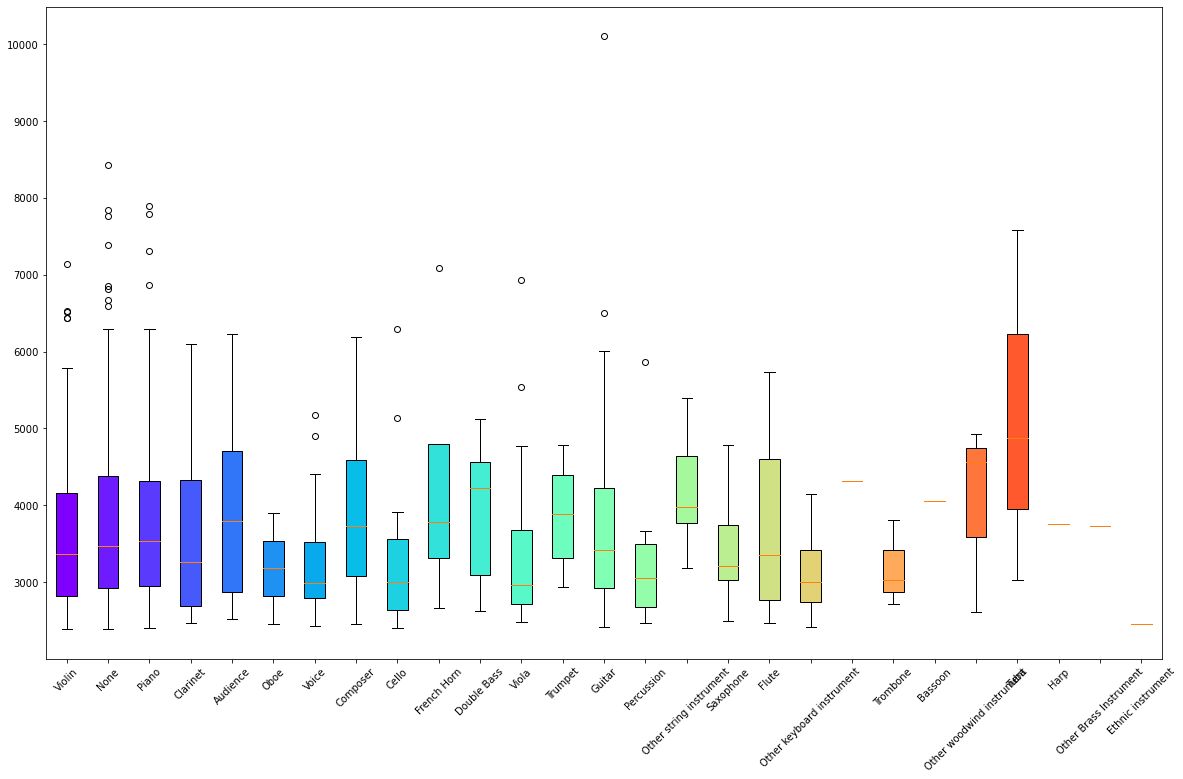

In [88]:
box_data = [item for item in flair_posts_ind.values()]
labels = [label.strip() for label in flair_posts_ind.keys()]
#box_data.sort(key=lambda posts: np.mean(posts), reverse=True)
            


fig, axes = plt.subplots(figsize=(20, 12))

bplot = axes.boxplot(box_data,
                     labels=labels,
                     patch_artist=True)

cmap = plt.cm.ScalarMappable(cmap='rainbow')
colors = np.arange(len(box_data))
colors = colors/len(box_data)
for patch, color in zip(bplot['boxes'], cmap.to_rgba(colors)):
    patch.set_facecolor(color)
            
plt.xticks(rotation=45)

plt.show()


In [89]:
for label in labels:
    print(f"'{label}'")

'Violin'
'None'
'Piano'
'Clarinet'
'Audience'
'Oboe'
'Voice'
'Composer'
'Cello'
'French Horn'
'Double Bass'
'Viola'
'Trumpet'
'Guitar'
'Percussion'
'Other string instrument'
'Saxophone'
'Flute'
'Other keyboard instrument'
''
'Trombone'
'Bassoon'
'Other woodwind instrument'
'Tuba'
'Harp'
'Other Brass Instrument'
'Ethnic instrument'
